In [44]:
import numpy as np
import pandas as pd
import nptyping as npt
import typing as t
from matplotlib import pyplot as plt

## Implementation de ACP
### import d'une matrice de donnees

In [2]:
data = pd.read_excel('autos_acp.xls', sheet_name=0,header=0,index_col=0)
data.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,FINITION,PRIX,R-POID.PUIS
Modele,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,B,30570,11.012658
Audi 100,1588,85,468,177,1110,160,TB,39990,13.058824
Simca 1300,1294,68,424,168,1050,152,M,29600,15.441176
Citroen GS Club,1222,59,412,161,930,151,M,28250,15.762712
Fiat 132,1585,98,439,164,1105,165,B,34900,11.275510


In [3]:
data.describe()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,PRIX,R-POID.PUIS
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778,34158.611111,13.180746
std,373.929846,20.376281,22.107358,5.313689,136.957808,12.140383,6571.577795,2.233932
min,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000,22100.000000,9.724771
25%,1310.250000,70.750000,424.000000,162.250000,1020.000000,151.250000,29842.500000,11.218878
50%,1577.500000,82.000000,434.500000,167.000000,1087.500000,160.000000,33345.000000,13.181751
75%,1797.500000,98.000000,448.000000,169.750000,1126.750000,165.000000,38457.500000,14.549244
max,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000,47700.000000,18.363636


In [4]:
data.shape

(18, 9)

In [5]:
# Etape1 normaliser les donnees
class CategoryNumerizer:
    
    def __init__(self, dataset: pd.DataFrame, serieName: str):
        self.dataset = dataset
        self.serie = self.dataset[serieName].copy()
        self.serieName = serieName
        self.categories = list(self.dataset[serieName].unique())
        
    def numerize(self):        
        for index, cat in enumerate(self.categories):
            self.serie[self.serie == cat] = index
        self.dataset[self.serieName] = self.serie.astype(float)
        return self.dataset
    
    def categoryze(self):
        for index, cat in enumerate(self.categories):
            self.serie[self.serie == index] = cat
        self.dataset[self.serieName] = self.serie.astype('category')
        return self.dataset


In [6]:
# Etape 2 centrer les donnes (mean = 0)
class CenterPreprocessor:
    
    def __init__(self, dataset: pd.DataFrame):
        self.dataset: pd.DataFrame = dataset
        self.p_mean_vector: pd.Series = dataset.mean(axis = 0)
        self.p_mean_matrix = (pd.DataFrame(np.ones(self.dataset.shape[0])) @ self.p_mean_vector.to_frame().transpose()).set_index(self.dataset.index)
    
    def fit(self):
        return self.dataset - self.p_mean_matrix 


In [7]:
# etape 3 reduire les donnees (std = 1)
class ReducerPreProcessor:
    
    def __init__(self, dataset: pd.DataFrame):
        self.dataset: pd.DataFrame = dataset
        self.p_std_vector = dataset.std(axis = 0)
        
    def fit(self):
        reduced_dataset = self.dataset.copy()
        for col in self.dataset.columns:
            reduced_dataset[col] = reduced_dataset[col] / self.p_std_vector[col]
        return reduced_dataset

In [8]:
categorizer = CategoryNumerizer(data, 'FINITION')
data = categorizer.numerize()

centerer = CenterPreprocessor(data)
data = centerer.fit()

reducer = ReducerPreProcessor(data)
data = reducer.fit()

In [9]:
data.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,FINITION,PRIX,R-POID.PUIS
Modele,,,,,,,,,
Alfasud TI,-0.753261,-0.275375,-1.831969,-1.066428,-1.524800,0.553708,-1.067924,-0.546081,-0.970525
Audi 100,-0.116778,0.019085,1.560566,1.944663,0.227564,0.141859,0.133490,0.887365,-0.054577
Simca 1300,-0.903021,-0.815218,-0.429721,0.250924,-0.210527,-0.517099,1.334905,-0.693686,1.011862
Citroen GS Club,-1.095571,-1.256908,-0.972527,-1.066428,-1.086709,-0.599469,1.334905,-0.899116,1.155794
Fiat 132,-0.124801,0.657082,0.248786,-0.501848,0.191056,0.553708,-1.067924,0.112817,-0.852862


In [46]:
print('mean : ', data.mean(axis= 0))
print('\n')
print('std : ', data.std(axis = 0))

mean :  CYL           -1.973730e-16
PUISS         -1.356939e-16
LONG          -1.233581e-17
LARG           1.776357e-15
POIDS          5.304399e-16
V-MAX          5.057683e-16
FINITION       4.934325e-17
PRIX           2.467162e-16
R-POID.PUIS    5.551115e-17
dtype: float64


std :  CYL            1.0
PUISS          1.0
LONG           1.0
LARG           1.0
POIDS          1.0
V-MAX          1.0
FINITION       1.0
PRIX           1.0
R-POID.PUIS    1.0
dtype: float64


#### Les donnees sont categorisees, centrees et reduites 
#### On peut maintenant passer a l'ACP

In [47]:
class ACP:
    
    def __init__(self, dataset: pd.DataFrame):
        self.dataset = dataset
        self.cov = self.dataset.cov()
        self.vals, self.vectors = np.linalg.eig(self.cov)
        self.vals_impact = np.flip(np.sort( np.round((self.vals / self.vals.size)*100) ) )
        
        
    def fit(self):
        return (self.dataset @ self.vectors[np.flip(np.argsort(self.vals)),:].transpose())


In [48]:
acp = ACP(dataset=data)
data_acp = acp.fit()
data_acp.head()

,0,1,2,3,4,5,6,7,8
Modele,,,,,,,,,
Alfasud TI,0.426893,2.088478,-0.271272,0.080064,0.571397,0.359531,-1.217558,1.663468,0.905261
Audi 100,-1.569158,-0.610212,0.710848,-0.140730,0.353221,0.618301,0.701582,-1.549328,-0.593114
Simca 1300,0.785064,0.794669,0.089659,-0.934753,-0.251865,-0.430685,1.537224,0.221064,-0.732065
Citroen GS Club,1.788423,1.895354,-0.305335,-0.689854,-0.733144,-0.427535,1.097393,0.711259,-0.734379
Fiat 132,-0.056047,-0.201182,0.071746,0.313254,0.540960,0.318309,-1.163307,-0.244248,1.015355


In [49]:
acp.vals_impact

array([63., 15., 10.,  5.,  4.,  2.,  1.,  1.,  0.])

In [50]:
data_acp.iloc[:, :3]

,0,1,2
Modele,,,
Alfasud TI,0.426893,2.088478,-0.271272
Audi 100,-1.569158,-0.610212,0.710848
Simca 1300,0.785064,0.794669,0.089659
Citroen GS Club,1.788423,1.895354,-0.305335
Fiat 132,-0.056047,-0.201182,0.071746
Lancia Beta,-0.062747,0.368364,0.553183
Peugeot 504,-0.586087,-0.585656,-1.239007
Renault 16 TL,0.711516,1.057202,-2.374006
Renault 30,-2.534412,-3.327826,1.928909


Text(0, 0.5, 'Composant 2')

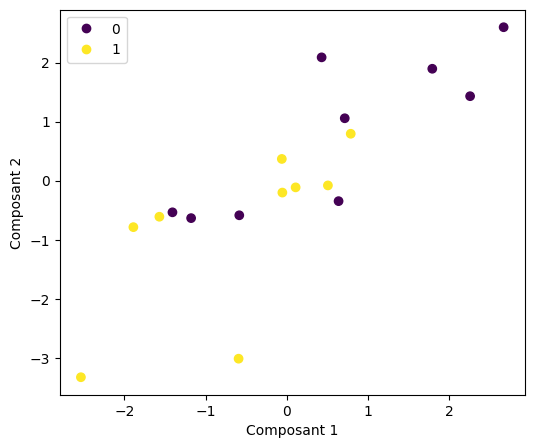

In [56]:
fig, ax =  plt.subplots(figsize=(6,5))
scatter = ax.scatter(data_acp[0], data_acp[1], c=data_acp[2] > data_acp[2].mean())
ax.legend(*scatter.legend_elements())
ax.set_xlabel('Composant 1')
ax.set_ylabel('Composant 2')